# K-Nearest-Neighbors
KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting 
of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a
function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

# Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

# Problem statement

Dataset:
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald 
Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals.

Source: https://archive.ics.uci.edu/ml/datasets/Iris

Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

# Question 1
Import libraries and load the dataset

In [153]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [154]:
df = pd.read_csv('iris.csv')
df.sample(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
116,117,6.5,3.0,5.5,1.8,Iris-virginica
9,10,4.9,3.1,1.5,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
20,21,5.4,3.4,1.7,0.2,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
119,120,6.0,2.2,5.0,1.5,Iris-virginica


In [155]:
df.shape

(152, 6)

In [156]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Data Pre-processing

# Question 2 - Estimating missing values
Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have 
to see how to replace those missing values with some estimated values (median)

In [157]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [158]:
pd.DataFrame(df.isnull().sum())

,0
Id,0
SepalLengthCm,1
SepalWidthCm,2
PetalLengthCm,2
PetalWidthCm,1
Species,0


In [159]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(df.iloc[:,:-1])
imputed_data = imputer.transform(df.iloc[:,:-1].values)
df.iloc[:,:-1] = imputed_data

iris = df

c:\Users\ELCOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [160]:
pd.DataFrame(df.isnull().sum())

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


# Question 3 - Dealing with categorical data
Change all the classes to numericals (0to2).

In [161]:
iris.iloc[:,5].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [162]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [163]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()

iris.iloc[:,-1] = class_label_encoder.fit_transform(iris.iloc[:,-1])

In [164]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.500000,3.000,5.200000,2.000000,2
148,149,6.200000,3.400,5.400000,2.300000,2
149,150,5.900000,3.000,5.100000,1.800000,2
150,151,5.900000,3.054,3.758667,1.202649,2
151,152,5.843709,3.054,3.758667,1.800000,2


# Question 4
Observe the association of each independent variable with target variable and drop variables from feature set having correlation 
in range -0.1 to 0.1 with target variable.

In [165]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.703344,-0.389905,0.865382,0.889288,0.942753
SepalLengthCm,0.703344,1.000000,-0.109368,0.871741,0.816256,0.775490
SepalWidthCm,-0.389905,-0.109368,1.000000,-0.420516,-0.355808,-0.415367
PetalLengthCm,0.865382,0.871741,-0.420516,1.000000,0.960771,0.939813
PetalWidthCm,0.889288,0.816256,-0.355808,0.960771,1.000000,0.951545
Species,0.942753,0.775490,-0.415367,0.939813,0.951545,1.000000


# Question 5
Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). 
They will be having almost no influence on the classification.

In [166]:
iris.var()

Id                 1938.0
SepalLengthCm    0.676633
SepalWidthCm     0.185514
PetalLengthCm    3.071945
PetalWidthCm     0.577079
Species          0.675322
dtype: object

# Question 6
Plot the scatter matrix for all the variables.

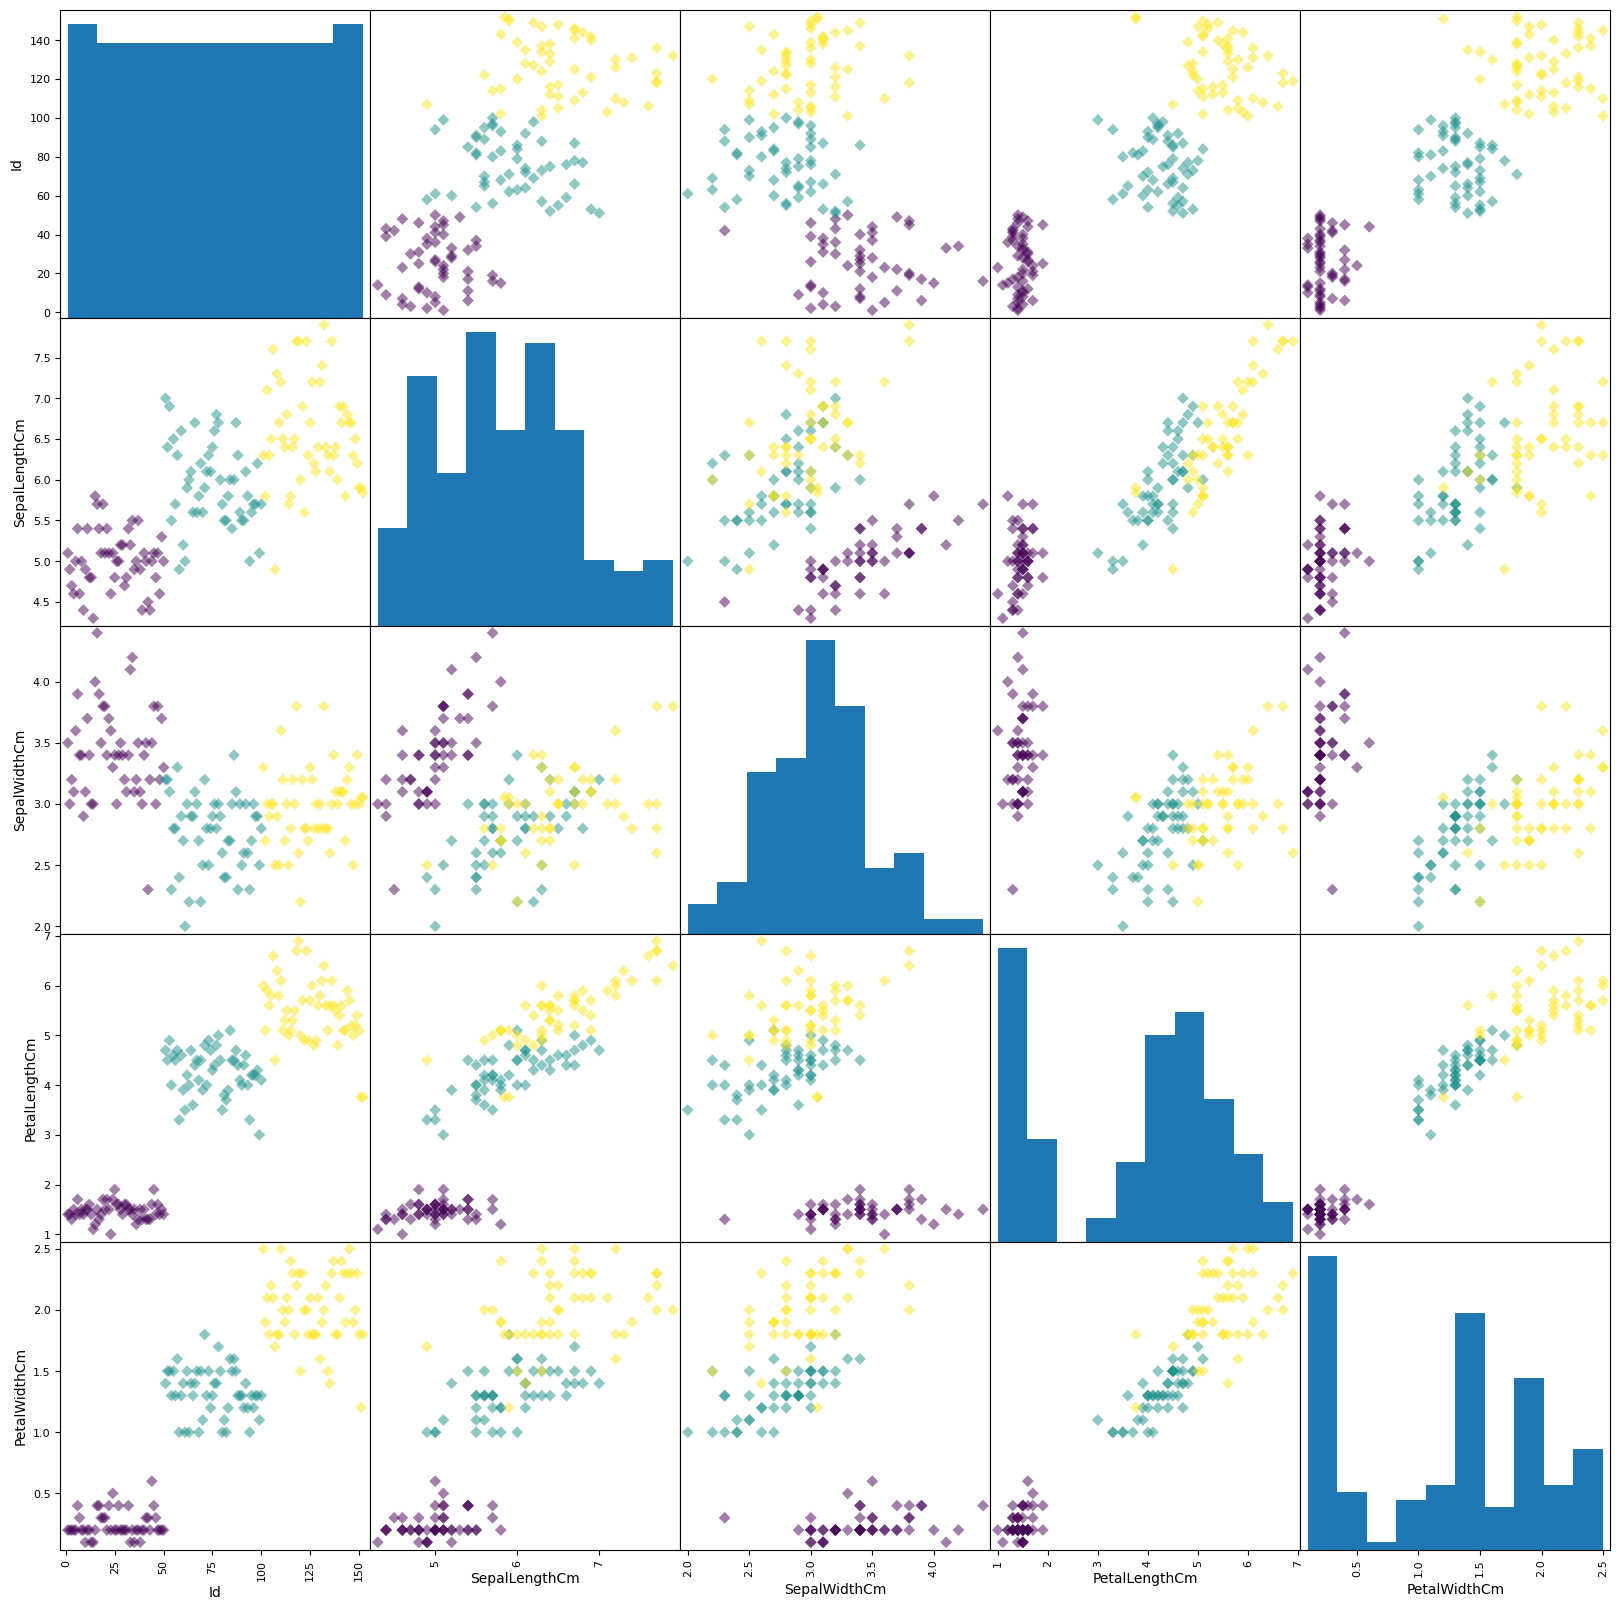

In [167]:
from pandas.plotting import scatter_matrix
iris = pd.DataFrame(iris)
scatter_matrix (iris,c=iris.iloc[:,-1],figsize=(20, 20), marker='D')
plt.show()

# Split the dataset into training and test sets

# Question 7
Split the dataset into training and test sets with 80-20 ratio.

In [168]:
# convert data into features and target
x=np.array(iris.iloc[:,1:5])
y=np.array(iris['Species'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [169]:
print(x_train.shape)
print(y_train.shape)
x_train=x_train.astype('int')
y_train=y_train.astype('int')

(121, 4)
(121,)


In [170]:
print(x_test.shape)
print(y_test.shape)
x_test=x_test.astype('int')
y_test=y_test.astype('int')

(31, 4)
(31,)


# Question 8 - Model
Build the model and train and test on training and test sets respectively using scikit-learn. Print the Accuracy of the model with different values of k=3,5,9.

Hint: For accuracy you can check accuracy_score() in scikit-learn

In [171]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
#fit the model
knn.fit(x_train, y_train)
# predict the response
y_pred = knn.predict(x_test)
#accuracy
print(accuracy_score(y_test,y_pred))

0.9354838709677419


In [172]:
knn = KNeighborsClassifier(n_neighbors=5)
#fit the model
knn.fit(x_train, y_train)
# predict the response
y_pred = knn.predict(x_test)
#accuracy
print(accuracy_score(y_test,y_pred))

0.9354838709677419


In [173]:
knn = KNeighborsClassifier(n_neighbors=9)
#fit the model
knn.fit(x_train, y_train)
# predict the response
y_pred = knn.predict(x_test)
#accuracy
print(accuracy_score(y_test,y_pred))

0.9354838709677419


# Question 9 - Cross Validation
Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the 
model with lowest MSE

In [174]:
mylist=list(range(20))
oddlist =list(filter(lambda x: x%2!=0,mylist))

In [177]:
ac_scores=[]
for k in oddlist:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = oddlist[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)


The optimal number of neighbors is 1


# Question 10
Plot misclassification error vs k (with k value on X-axis) using matplotlib.

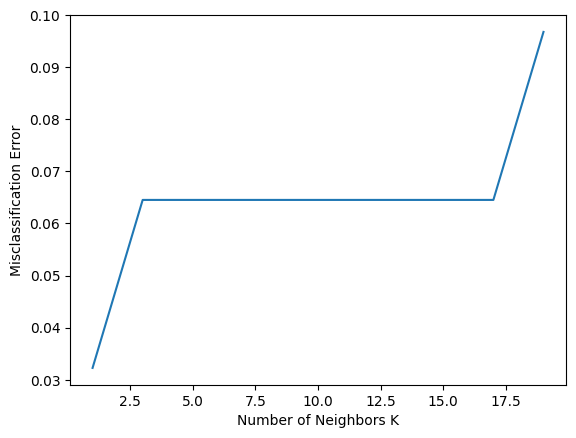

In [178]:
#musclassification error vs number of neighbors k
plt.plot(oddlist, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()